# TI3001C: Data Analytics and Artificial Intelligence Tools I
### M2. Data Engineering

### Content

1. Load data
1. Data Processing: Normalization
1. Simple EDA

In [15]:
# importamos librerías
import warnings
warnings.filterwarnings("ignore")
import pandas as pd # librería para poder usad DataFrames (tablas)

In [16]:
import plotly.express as px
import matplotlib.pyplot as plt # to plot
import seaborn as sns # to plot

### 1. Load data

In [42]:
# we define a function to get the data
def get_data():
    """
    Function to get the data
    """

    # we read the data from a csv file
    dataSet = pd.read_csv("amazon_sales_data 2025.csv", header=0, index_col=1)
    # we convert the index to datetime
    dataSet.index = pd.to_datetime(dataSet.index,format='%d/%m/%y',errors='ignore')

    return dataSet

# we define a function to save the data
def save_data(dataSet):
    """
    Function to save the data to a csv file
    """

    # we save the data to a csv file
    dataSet.to_csv("amazon_sales_data_processed.csv")

# we define a function to get info about the data
def infoData(dataSet):
    """
    Function to get general information about the data
    """

    print(dataSet.head())
    print("")
    print(dataSet.info())
    print("")
    print(dataSet.isnull().sum())
    print("")

In [43]:
# we read the data and display the info
data = get_data()
infoData(data)

         Order ID        Product     Category  Price  Quantity  Total Sales  \
Date                                                                          
14-03-25  ORD0001  Running Shoes     Footwear     60         3          180   
20-03-25  ORD0002     Headphones  Electronics    100         4          400   
15-02-25  ORD0003  Running Shoes     Footwear     60         2          120   
19-02-25  ORD0004  Running Shoes     Footwear     60         3          180   
10-03-25  ORD0005     Smartwatch  Electronics    150         3          450   

          Customer Name Customer Location Payment Method     Status  
Date                                                                 
14-03-25     Emma Clark          New York     Debit Card  Cancelled  
20-03-25  Emily Johnson     San Francisco     Debit Card    Pending  
15-02-25       John Doe            Denver     Amazon Pay  Cancelled  
19-02-25  Olivia Wilson            Dallas    Credit Card    Pending  
10-03-25     Emma Clark   

### 2. Data Processing: Normalization 

#### 2.1 Min-Max normalization (Scaling)

    This refers to changing the scale of the values so that they fit within a specific range, such as [0,1] or [−1,1].
    
    Example: Min-Max Scaling, where the formula is:

$X'=\frac{X - X_{\min}}{X_{\max} - X_{\min}}$

#### 2.2 Z-score normalization (Standardization)

    Transform the data so that it has a mean of 0 and a standard deviation of 1.
    
    Typical formula:

$X'=\frac{X - {\mu}}{{\sigma}}$

#### 2.3 Decimal scaling normalization 

    In this technique, we shift the decimal point of the attribute values depending on the maximum value among all the attribute values.

In [44]:
def pre_process(dataSet):
    """
    Function to pre process the data
    """

    dataSet["Product"] = [ 10 if x =='Book' else x for x in dataSet["Product"]]
    dataSet["Product"] = [ 9 if x =='Headphones' else x for x in dataSet["Product"]]
    dataSet["Product"] = [ 8 if x =='Jeans' else x for x in dataSet["Product"]]
    dataSet["Product"] = [ 7 if x =='Laptop' else x for x in dataSet["Product"]]
    dataSet["Product"] = [ 6 if x =='Refrigerator' else x for x in dataSet["Product"]]
    dataSet["Product"] = [ 5 if x =='Running Shoes' else x for x in dataSet["Product"]]
    dataSet["Product"] = [ 4 if x =='Smartphone' else x for x in dataSet["Product"]]
    dataSet["Product"] = [ 3 if x =='Smartwatch' else x for x in dataSet["Product"]]
    dataSet["Product"] = [ 2 if x =='T-Shirt' else x for x in dataSet["Product"]]
    dataSet["Product"] = [ 1 if x =='Washing Machine' else x for x in dataSet["Product"]]

    dataSet["Category"] = [ 5 if x =='Books' else x for x in dataSet["Category"]]
    dataSet["Category"] = [ 4 if x =='Clothing' else x for x in dataSet["Category"]]
    dataSet["Category"] = [ 3 if x =='Electronics' else x for x in dataSet["Category"]]
    dataSet["Category"] = [ 2 if x =='Footwear' else x for x in dataSet["Category"]]
    dataSet["Category"] = [ 1 if x =='Home Appliances' else x for x in dataSet["Category"]]

    dataSet["Customer Location"] = [ 10 if x =='Boston' else x for x in dataSet["Customer Location"]]
    dataSet["Customer Location"] = [ 9 if x =='Chicago' else x for x in dataSet["Customer Location"]]
    dataSet["Customer Location"] = [ 8 if x =='Dallas' else x for x in dataSet["Customer Location"]]
    dataSet["Customer Location"] = [ 7 if x =='Denver' else x for x in dataSet["Customer Location"]]
    dataSet["Customer Location"] = [ 6 if x =='Houston' else x for x in dataSet["Customer Location"]]
    dataSet["Customer Location"] = [ 5 if x =='Los Angeles' else x for x in dataSet["Customer Location"]]
    dataSet["Customer Location"] = [ 4 if x =='Miami' else x for x in dataSet["Customer Location"]]
    dataSet["Customer Location"] = [ 3 if x =='New York' else x for x in dataSet["Customer Location"]]
    dataSet["Customer Location"] = [ 2 if x =='San Francisco' else x for x in dataSet["Customer Location"]]
    dataSet["Customer Location"] = [ 1 if x =='Seattle' else x for x in dataSet["Customer Location"]]

    dataSet["Payment Method"] = [ 5 if x =='Amazon Pay' else x for x in dataSet["Payment Method"]]
    dataSet["Payment Method"] = [ 4 if x =='Credit Card' else x for x in dataSet["Payment Method"]]
    dataSet["Payment Method"] = [ 3 if x =='Debit Card' else x for x in dataSet["Payment Method"]]
    dataSet["Payment Method"] = [ 2 if x =='Gift Card' else x for x in dataSet["Payment Method"]]
    dataSet["Payment Method"] = [ 1 if x =='PayPal' else x for x in dataSet["Payment Method"]]

    dataSet["Status"] = [ 3 if x =='Cancelled' else x for x in dataSet["Status"]]
    dataSet["Status"] = [ 2 if x =='Pending' else x for x in dataSet["Status"]]
    dataSet["Status"] = [ 1 if x =='Completed' else x for x in dataSet["Status"]]

    dataSet2 = pd.DataFrame()
    dataSet2[["Quantity", "Price", "Total Sales"]] = dataSet[["Quantity", "Price", "Total Sales"]]
    dataSet2["Total Sales Min-Max"] = (dataSet2["Total Sales"]-dataSet2["Total Sales"].min())/(dataSet2["Total Sales"].max()-dataSet2["Total Sales"].min())
    dataSet2["Total Sales Z-Score"] = (dataSet2["Total Sales"]-dataSet2["Total Sales"].mean())/dataSet2["Total Sales"].std()
    dataSet2["Total Sales Decimal scaling"] = dataSet2["Total Sales"]/dataSet2["Total Sales"].abs().max()
    
    return dataSet, dataSet2

In [ ]:
# we preprocess the data
preprocessData, dataSet2 = pre_process(data)
infoData(preprocessData)

         Order ID  Product  Category  Price  Quantity  Total Sales  \
Date                                                                 
14-03-25  ORD0001        5         2     60         3          180   
20-03-25  ORD0002        9         3    100         4          400   
15-02-25  ORD0003        5         2     60         2          120   
19-02-25  ORD0004        5         2     60         3          180   
10-03-25  ORD0005        3         3    150         3          450   

          Customer Name  Customer Location  Payment Method  Status  
Date                                                                
14-03-25     Emma Clark                  3               3       3  
20-03-25  Emily Johnson                  2               3       2  
15-02-25       John Doe                  7               5       3  
19-02-25  Olivia Wilson                  8               4       2  
10-03-25     Emma Clark                  3               3       2  

<class 'pandas.core.frame

In [ ]:
# we visualize the second dataframe 
print(round(dataSet2.head(),4))
save_data(dataSet2)

          Quantity  Price  Total Sales  Total Sales Min-Max  \
Date                                                          
14-03-25         3     60          180               0.0276   
20-03-25         4    100          400               0.0643   
15-02-25         2     60          120               0.0175   
19-02-25         3     60          180               0.0276   
10-03-25         3    150          450               0.0727   

          Total Sales Z-Score  Total Sales Decimal scaling  
Date                                                        
14-03-25              -0.6352                       0.0300  
20-03-25              -0.4595                       0.0667  
15-02-25              -0.6831                       0.0200  
19-02-25              -0.6352                       0.0300  
10-03-25              -0.4196                       0.0750  


In [83]:
# we check the statistics of the second dataframe
print("Total Sales Min-Max: \n",
      round(dataSet2["Total Sales Min-Max"].max(),4),"\n", 
      round(dataSet2["Total Sales Min-Max"].min(),4),"\n",
      round(dataSet2["Total Sales Min-Max"].mean(),4),"\n",
      round(dataSet2["Total Sales Min-Max"].std(),4),"\n"
      )

print("Total Sales Z-Score: \n",
      round(dataSet2["Total Sales Z-Score"].max(),4),"\n",
      round(dataSet2["Total Sales Z-Score"].min(),4),"\n",
      round(dataSet2["Total Sales Z-Score"].mean(),4),"\n",
      round(dataSet2["Total Sales Z-Score"].std(),4),"\n"
      )

print("Total Sales Decimal scaling: \n",
      round(dataSet2["Total Sales Decimal scaling"].max(),4),"\n",
      round(dataSet2["Total Sales Decimal scaling"].min(),4),"\n",
      round(dataSet2["Total Sales Decimal scaling"].mean(),4),"\n",
      round(dataSet2["Total Sales Decimal scaling"].std(),4)
      )

Total Sales Min-Max: 
 1.0 
 0.0 
 0.1605 
 0.2092 

Total Sales Z-Score: 
 4.0129 
 -0.767 
 -0.0 
 1.0 

Total Sales Decimal scaling: 
 1.0 
 0.0025 
 0.1626 
 0.2087


In [77]:
# we define a function to visualize the data
def grafDatos(datos):

    val_mean=datos.mean().values[0]
    val_std=datos.std().values[0]

    fig, ax = plt.subplots(1, 2, figsize=(10,3))

    print(datos.head())

    ax[0].plot(datos.values, label="Income", color='red')
    ax[0].axhline(val_mean, label="Media", color = 'm')
    ax[0].axhline(val_std, label="Std", color = 'y')
    ax[0].grid(color='b',linestyle='dashed')
    ax[0].set_title('Total Sales', fontweight='bold')
    #ax[0].set_xlabel('Sales')
    ax[0].set_ylabel('Income')
    ax[0].legend(loc='upper right')

    ax[1].hist(datos, bins=5, color='navy', orientation="horizontal")
    ax[1].axhline(val_mean, label="Media", color = 'm')
    ax[1].axhline(val_std, label="Std", color = 'y')
    ax[1].grid(color='b',linestyle='dashed')
    ax[1].set_title('DISTRIBUCIÓN', fontweight='bold')
    ax[1].set_xlabel('Frecuencia')
    ax[1].set_ylabel('Clases')
    ax[1].legend(loc='upper right')

    plt.show()

          Total Sales
Date                 
14-03-25          180
20-03-25          400
15-02-25          120
19-02-25          180
10-03-25          450


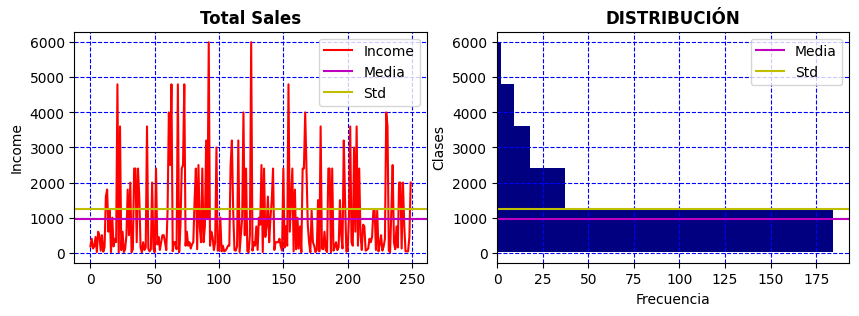

In [78]:
grafDatos(dataSet2[["Total Sales"]])

          Total Sales Min-Max
Date                         
14-03-25             0.027569
20-03-25             0.064327
15-02-25             0.017544
19-02-25             0.027569
10-03-25             0.072682


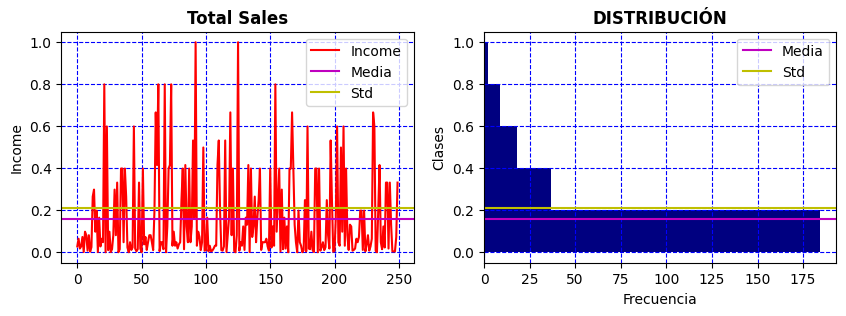

In [79]:
grafDatos(dataSet2[["Total Sales Min-Max"]])

          Total Sales Z-Score
Date                         
14-03-25            -0.635231
20-03-25            -0.459527
15-02-25            -0.683150
19-02-25            -0.635231
10-03-25            -0.419595


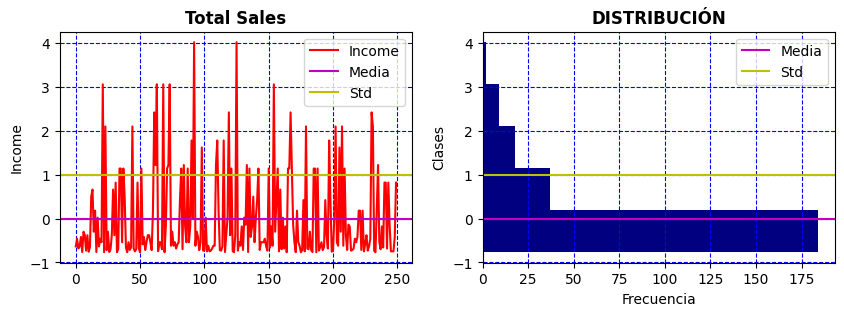

In [80]:
grafDatos(dataSet2[["Total Sales Z-Score"]])

          Total Sales Decimal scaling
Date                                 
14-03-25                     0.030000
20-03-25                     0.066667
15-02-25                     0.020000
19-02-25                     0.030000
10-03-25                     0.075000


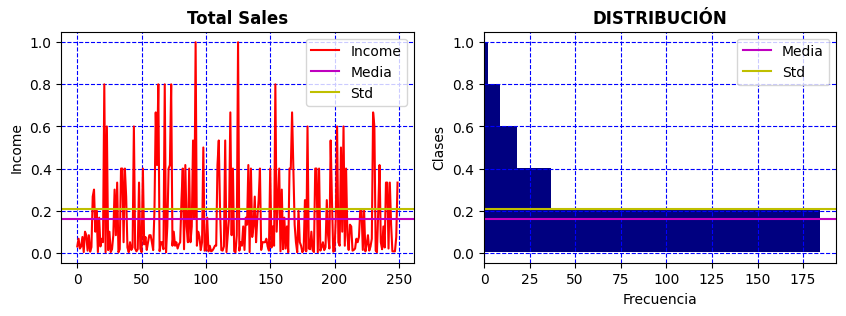

In [81]:
grafDatos(dataSet2[["Total Sales Decimal scaling"]])

### 3. Simple EDA

In [9]:

def getEDA(dataSet):
    """
    Function to get the EDA
    """

    product_sales = dataSet.pivot_table(index="Product", values="Total Sales", aggfunc="sum")
    print(product_sales)
    print("")

    plt.figure()
    plt.bar(product_sales.index, product_sales["Total Sales"])
    plt.title('Total Sales by Product', fontweight='bold')
    plt.xlabel("Product", fontweight='bold')
    plt.ylabel("Total Sales", fontweight='bold')
    plt.show()
    print("")

    product_sales = product_sales.reset_index()
    product_sales["Product"] = product_sales["Product"].astype(str)
    fig = px.line_polar(product_sales, r='Total Sales', theta='Product', line_close=True)
    fig.update_traces(fill='toself')
    fig.update_layout(title=dict(
        text='Total Sales by Product'),
        font=dict(color='darkblue'))
    fig.show()
    print("")

    category_sales = dataSet.pivot_table(index="Category", values="Total Sales", aggfunc="sum")
    print(category_sales)
    print("")

    category_sales = category_sales.reset_index()
    category_sales["Category"] = category_sales["Category"].astype(str)
    fig = px.line_polar(category_sales, r='Total Sales', theta='Category', line_close=True)
    fig.update_traces(fill='toself')
    fig.update_layout(title='Total Sales by Category')
    fig.show()
    print("")

    location_sales = dataSet.pivot_table(index="Customer Location", values="Total Sales", aggfunc="sum")
    print(location_sales)
    print("")

    location_sales = location_sales.reset_index()
    location_sales["Customer Location"] = location_sales["Customer Location"].astype(str)
    fig = px.line_polar(location_sales, r='Total Sales', theta='Customer Location', line_close=True)
    fig.update_traces(fill='toself')
    fig.update_layout(title='Total Sales by Customer Location')
    fig.show()
    print("")

    payment_sales = dataSet.pivot_table(index="Payment Method", values="Total Sales", aggfunc="sum")
    print(payment_sales)
    print("")

    payment_sales = payment_sales.reset_index()
    payment_sales["Payment Method"] = payment_sales["Payment Method"].astype(str)
    fig = px.line_polar(payment_sales, r='Total Sales', theta='Payment Method', line_close=True)
    fig.update_traces(fill='toself')
    fig.update_layout(title='Total Sales by Payment Method')
    fig.show()
    print("")

    product_category = dataSet.pivot_table(index=['Product'], columns=['Category'], values="Total Sales", aggfunc="sum", fill_value=0)
    print(product_category)
    print("")

    for col in range(len(product_category.columns)):
        plt.figure()
        plt.bar(product_category.index, product_category.iloc[:,col])
        plt.title("Category " + str(product_category.columns[col]), fontweight='bold')
        plt.xlabel("Product", fontweight='bold')
        plt.ylabel("Total Sales", fontweight='bold')
        plt.show()
        print("")

        print(f"Total sales in this categroy ${product_category.iloc[:,col].sum():,}")
        print("Product ", product_category.iloc[:,col].idxmax(),
              f" has the highest sales in this category ${product_category.iloc[:,col].max():,}")
        print("")


    product_quantity = dataSet.pivot_table(index=['Product'], columns=['Quantity'], values="Total Sales", aggfunc="sum", fill_value=0)
    print(product_quantity)
    print("")

    for col in range(len(product_quantity.columns)):
        plt.figure()
        plt.bar(product_quantity.index, product_quantity.iloc[:,col])
        plt.title("Quantity " + str(product_quantity.columns[col]), fontweight='bold')
        plt.xlabel("Product", fontweight='bold')
        plt.ylabel("Total Sales", fontweight='bold')
        plt.show()
        print("")

        print(f"Total sales in this quantity ${product_quantity.iloc[:,col].sum():,}")
        print("Product ", product_quantity.iloc[:,col].idxmax(),
              f" has the highest sales in this quantity ${product_quantity.iloc[:,col].max():,}")
        print("")


    product_location = dataSet.pivot_table(index=['Product'], columns=['Customer Location'], values="Total Sales", aggfunc="sum", fill_value=0)
    print(product_location)
    print("")

    for col in range(len(product_location.columns)):
        plt.figure()
        plt.bar(product_location.index, product_location.iloc[:,col])
        plt.title("Location " + str(product_location.columns[col]), fontweight='bold')
        plt.xlabel("Product", fontweight='bold')
        plt.ylabel("Total Sales", fontweight='bold')
        plt.show()
        print("")

        print(f"Total sales in this location ${product_location.iloc[:,col].sum():,}")
        print("Product ", product_location.iloc[:,col].idxmax(),
              f" has the highest sales in this location ${product_location.iloc[:,col].max():,}")
        print("")

    customer_product = dataSet.pivot_table(index=['Customer Name'], columns=['Product'], values="Total Sales", aggfunc="sum", fill_value=0)
    print(customer_product)
    print("")

    customer_location = dataSet.pivot_table(index=['Customer Name'], columns=['Customer Location'], values="Total Sales", aggfunc="sum", fill_value=0)
    print(customer_location)
    print("")



         Total Sales
Product             
1              27000
2               1060
3              15750
4              48500
5               4320
6              78000
7              58400
8               2480
9               7300
10              1035



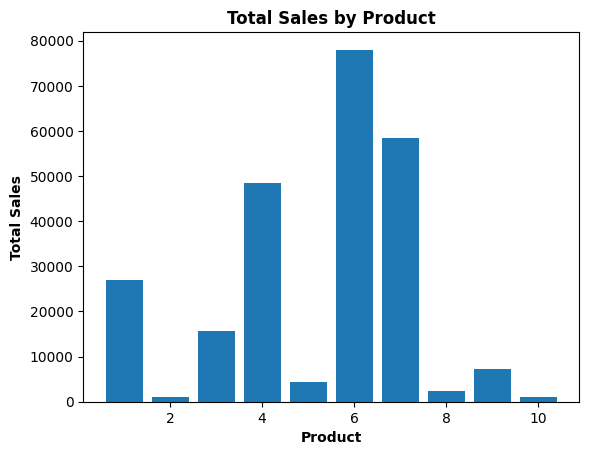


          Total Sales
Category             
1              105000
2                4320
3              129950
4                3540
5                1035




                   Total Sales
Customer Location             
1                        26890
2                        16195
3                        18940
4                        31700
5                        17820
6                        28390
7                        29785
8                        27145
9                        20810
10                       26170




                Total Sales
Payment Method             
1                     69645
2                     47955
3                     31900
4                     61595
5                     32750




Category      1     2      3     4     5
Product                                 
1         27000     0      0     0     0
2             0     0      0  1060     0
3             0     0  15750     0     0
4             0     0  48500     0     0
5             0  4320      0     0     0
6         78000     0      0     0     0
7             0     0  58400     0     0
8             0     0      0  2480     0
9             0     0   7300     0     0
10            0     0      0     0  1035



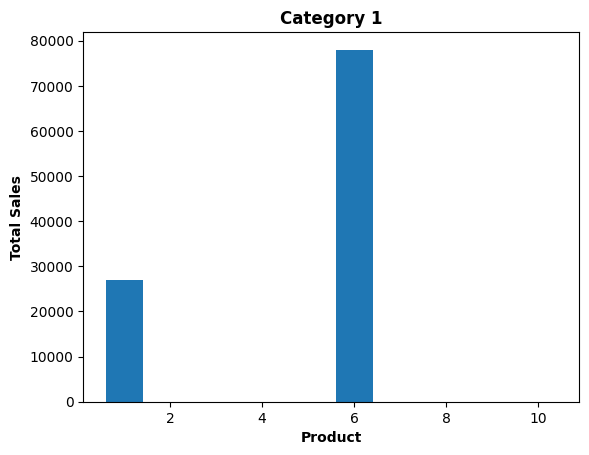


Total sales in this categroy $105,000
Product  6  has the highest sales in this category $78,000



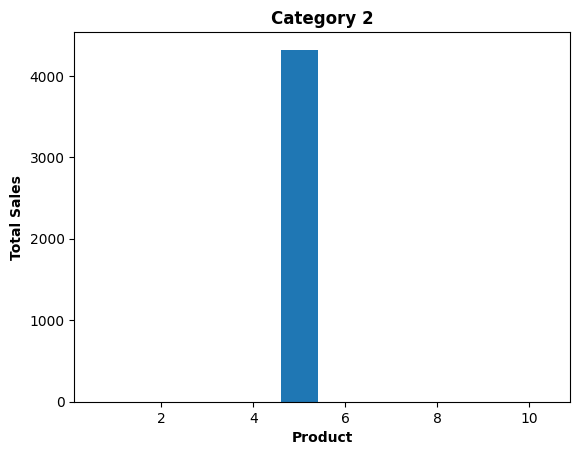


Total sales in this categroy $4,320
Product  5  has the highest sales in this category $4,320



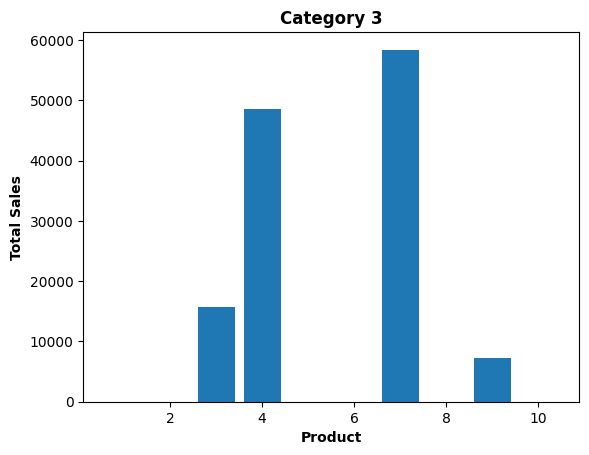


Total sales in this categroy $129,950
Product  7  has the highest sales in this category $58,400



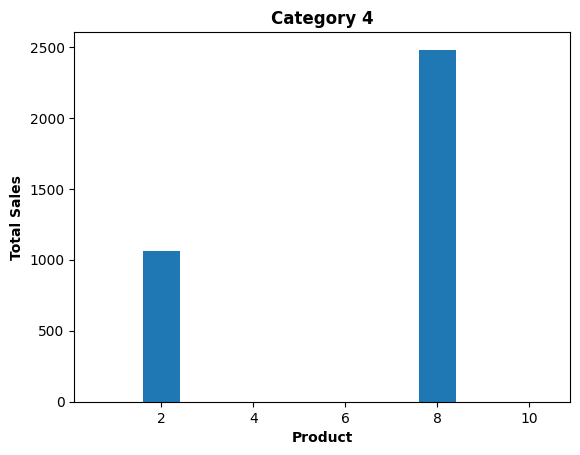


Total sales in this categroy $3,540
Product  8  has the highest sales in this category $2,480



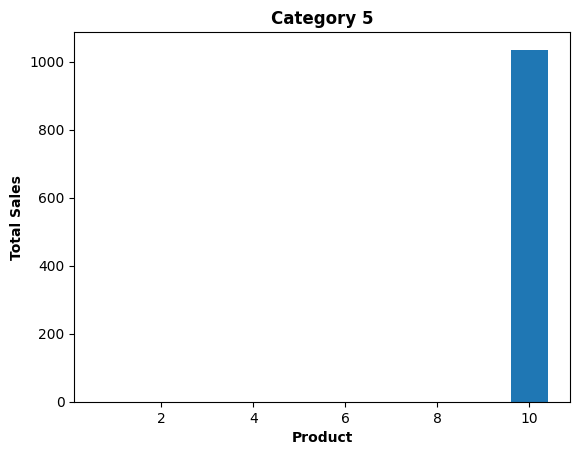


Total sales in this categroy $1,035
Product  10  has the highest sales in this category $1,035

Quantity     1      2      3      4      5
Product                                   
1         2400   3600   5400   9600   6000
2          120    200    180    160    400
3          600   3300   2700   2400   6750
4         4500   8000   9000  12000  15000
5          360    960   1080    720   1200
6         6000  14400  21600  24000  12000
7         3200   4800  21600  12800  16000
8          160    400    240    480   1200
9          400   1000   2400   2000   1500
10         165     60     90    120    600



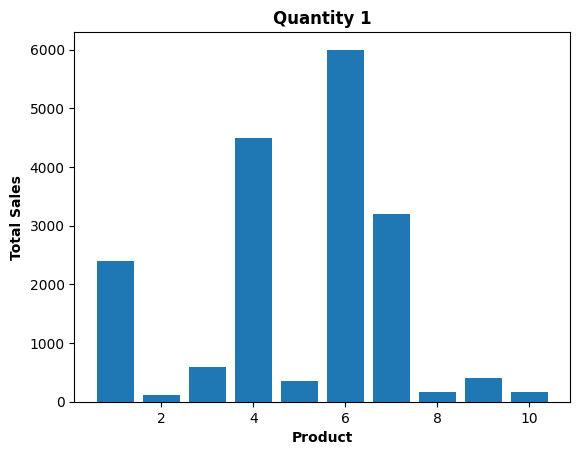


Total sales in this quantity $17,905
Product  6  has the highest sales in this quantity $6,000



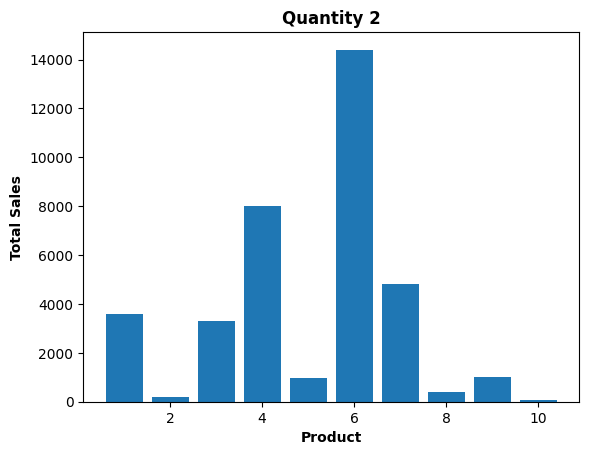


Total sales in this quantity $36,720
Product  6  has the highest sales in this quantity $14,400



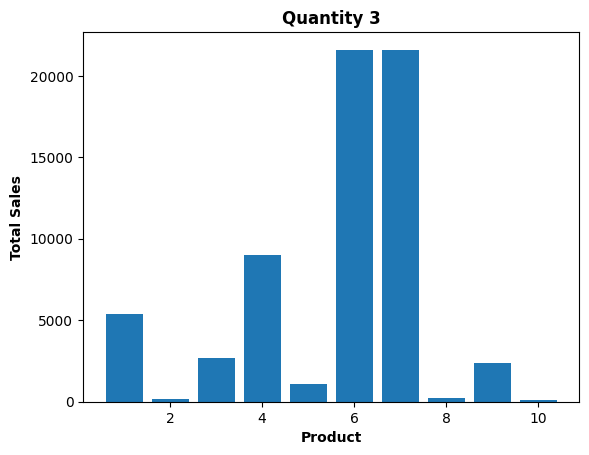


Total sales in this quantity $64,290
Product  6  has the highest sales in this quantity $21,600



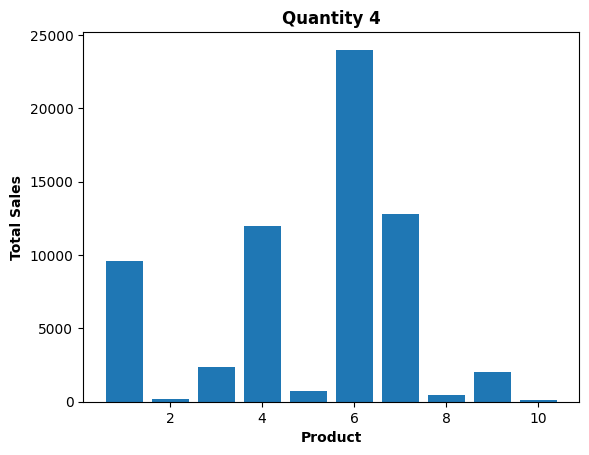


Total sales in this quantity $64,280
Product  6  has the highest sales in this quantity $24,000



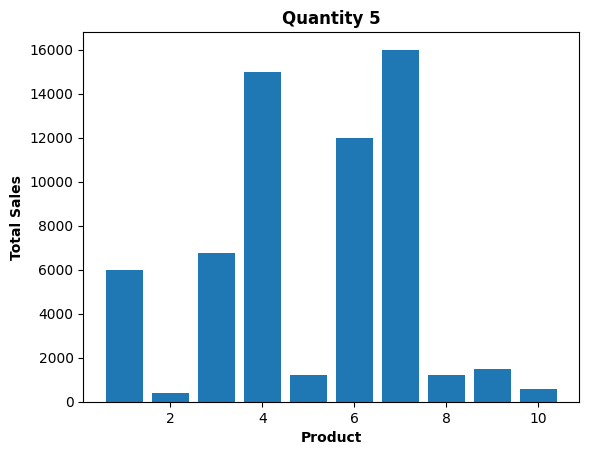


Total sales in this quantity $60,650
Product  7  has the highest sales in this quantity $16,000

Customer Location     1      2     3     4     5     6      7      8     9   \
Product                                                                       
1                   4800      0  2400  5400  2400  4800   1800   3600  1200   
2                      0      0   160   100     0    80    320    140   100   
3                   1200   1200  1950  1200  1050  3300   1650   1650   300   
4                   5500    500  2000  9500  1500  5000   4000   4500  9500   
5                      0    480   360   780   660   780    360    480   240   
6                  10800   2400  4800  4800  3600  4800  13200  15600  6000   
7                   3200  10400  5600  8800  8000  8000   8000      0  2400   
8                    400    160   640     0    80     0     80    800   160   
9                    900    800  1000  1000   500  1600    300    300   700   
10                    90    255  

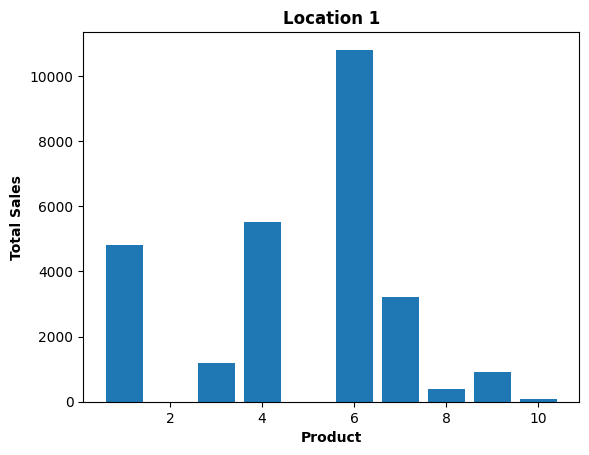


Total sales in this location $26,890
Product  6  has the highest sales in this location $10,800



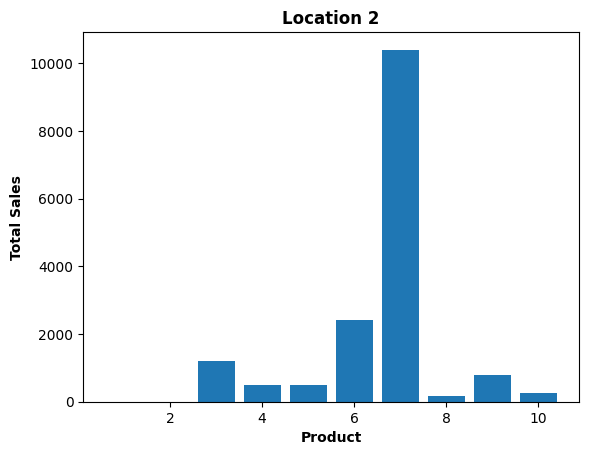


Total sales in this location $16,195
Product  7  has the highest sales in this location $10,400



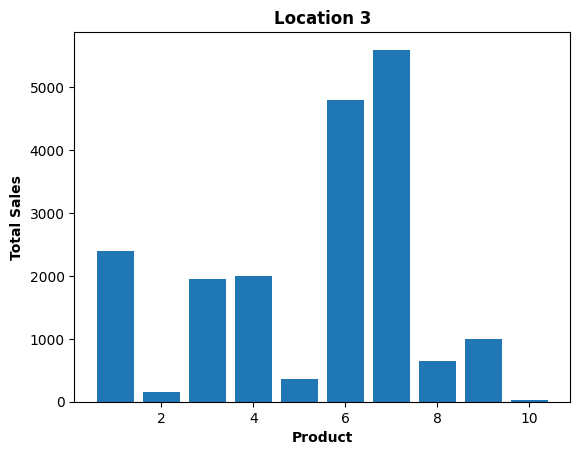


Total sales in this location $18,940
Product  7  has the highest sales in this location $5,600



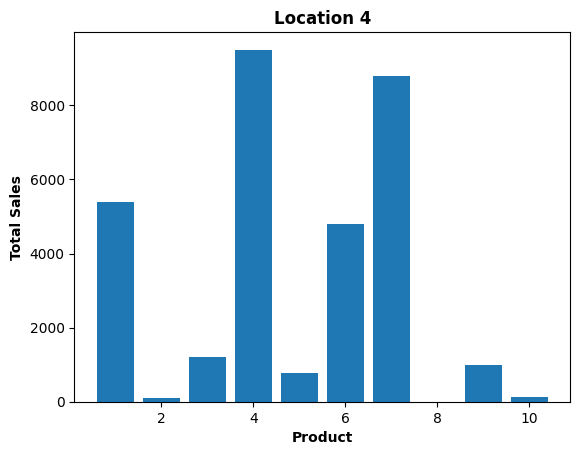


Total sales in this location $31,700
Product  4  has the highest sales in this location $9,500



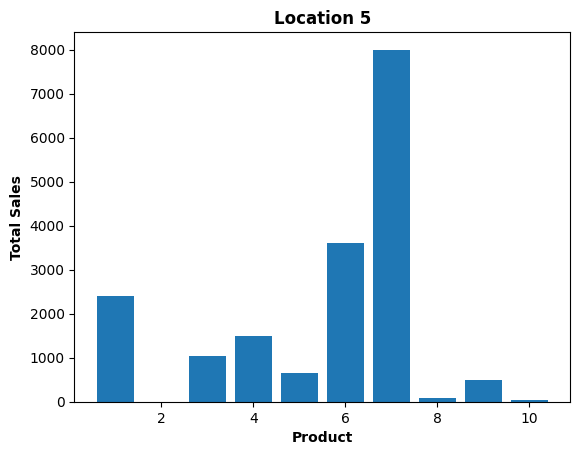


Total sales in this location $17,820
Product  7  has the highest sales in this location $8,000



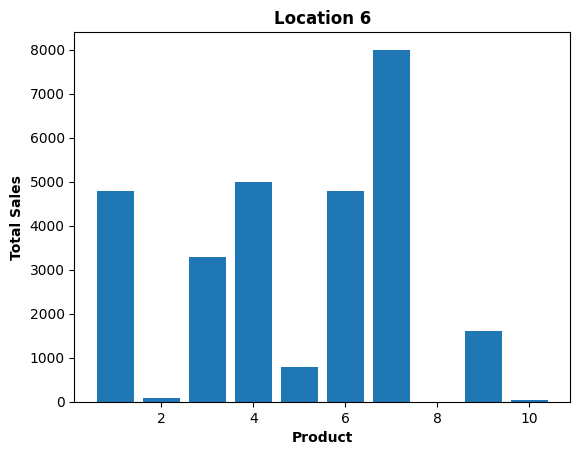


Total sales in this location $28,390
Product  7  has the highest sales in this location $8,000



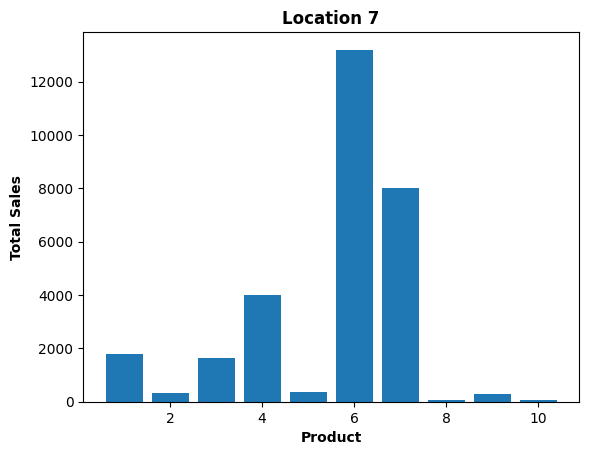


Total sales in this location $29,785
Product  6  has the highest sales in this location $13,200



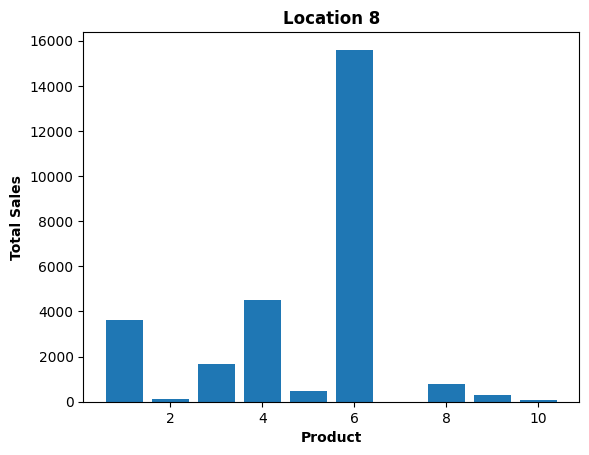


Total sales in this location $27,145
Product  6  has the highest sales in this location $15,600



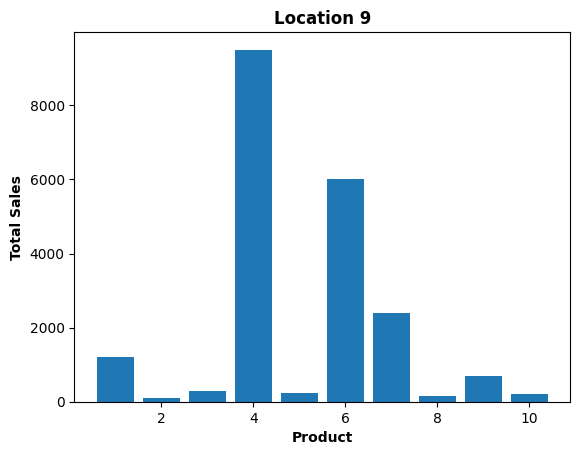


Total sales in this location $20,810
Product  4  has the highest sales in this location $9,500



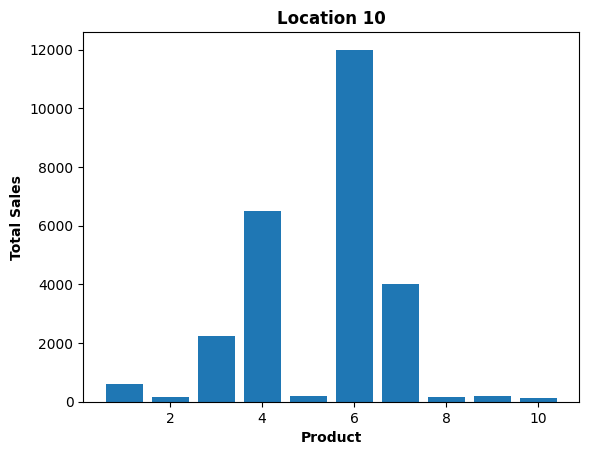


Total sales in this location $26,170
Product  6  has the highest sales in this location $12,000

Product          1    2     3     4     5      6      7    8     9    10
Customer Name                                                           
Chris White    3600  100  1050  4500   480   6000   2400   80   600   75
Daniel Harris     0   80  1350  1000     0   7200   7200  480  1500  135
David Lee      1200   40  1500  4000   360  14400      0  280   600  285
Emily Johnson  3000    0  2400  7000   360   4800   4800  200   900   15
Emma Clark     6000  260  1950  6500  1200   3600   9600    0   500   90
Jane Smith     3000  280  1200  2500   660   9600  12800  240   800  105
John Doe        600   20  2400  4500   120  10800   7200  440   700   90
Michael Brown  7200   40  1800  5500   300      0   6400  440   900   75
Olivia Wilson  2400  180   900  9000   540  14400   8000  160   500   90
Sophia Miller     0   60  1200  4000   300   7200      0  160   300   75

Customer Location    1   

In [13]:
getEDA(preprocessData)